In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


Getting data

In [2]:
data=pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.shape

(145460, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

check number of missing values

In [5]:
data.isnull().sum()


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
data['WindGustDir'].value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

Convert strings to numerical
There is many ways like one hot encoding or dummies and also this way

In [7]:
wind_map={'W':0,'SE':1,'N':2,'SSE':3,
          'E':4,'S':5,'WSW':6,'SW':7,
          'SSW':8,'WNW':9,'NW':10,'ENE':11,
          'ESE':12,'NE':13,'NNW':14,'NNE':15
    
}

In [8]:
data['WindGustDir']=data['WindGustDir'].map(wind_map)

In [9]:
data['WindDir9am'].value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [10]:
wind9_map={'W':0,'SE':1,'N':2,'SSE':3,
          'E':4,'S':5,'WSW':6,'SW':7,
          'SSW':8,'WNW':9,'NW':10,'ENE':11,
          'ESE':12,'NE':13,'NNW':14,'NNE':15
    
}
data['WindDir9am']=data['WindDir9am'].map(wind9_map)

In [11]:
data['WindDir3pm'].value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [12]:
wind3_map={'W':0,'SE':1,'N':2,'SSE':3,
          'E':4,'S':5,'WSW':6,'SW':7,
          'SSW':8,'WNW':9,'NW':10,'ENE':11,
          'ESE':12,'NE':13,'NNW':14,'NNE':15
    
}
data['WindDir3pm']=data['WindDir3pm'].map(wind3_map)

it's not rain today in most regions

In [13]:
data['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [14]:
today_map={'No':0,"Yes":1}
data['RainToday']=data['RainToday'].map(today_map)

also it's not rain tomorrow at the same number of region mostly

In [51]:
data['RainTomorrow'].value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

In [16]:
tomorrow_map={'No':0,"Yes":1}
data['RainTomorrow']=data['RainTomorrow'].map(tomorrow_map)

handling missing values

In [17]:
def fill_nan(data):
    for index, column in enumerate(data.columns[2:23]):
        
        data[column] = data[column].fillna(data[column].median())
    return data
        
data = fill_nan(data)

In [18]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [19]:
data['WindGustDir']=data['WindGustDir'].astype('int')

In [20]:
data['WindDir9am']=data['WindDir9am'].astype('int')

In [21]:
data['WindDir3pm']=data['WindDir3pm'].astype('int')

In [22]:
data['RainToday']=data['RainToday'].astype('int')

In [23]:
data['RainTomorrow']=data['RainTomorrow'].astype('int')

In [24]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,0,44.0,0,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,9,44.0,14,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,6,46.0,0,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,13,24.0,1,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,0,41.0,11,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


feature distribution

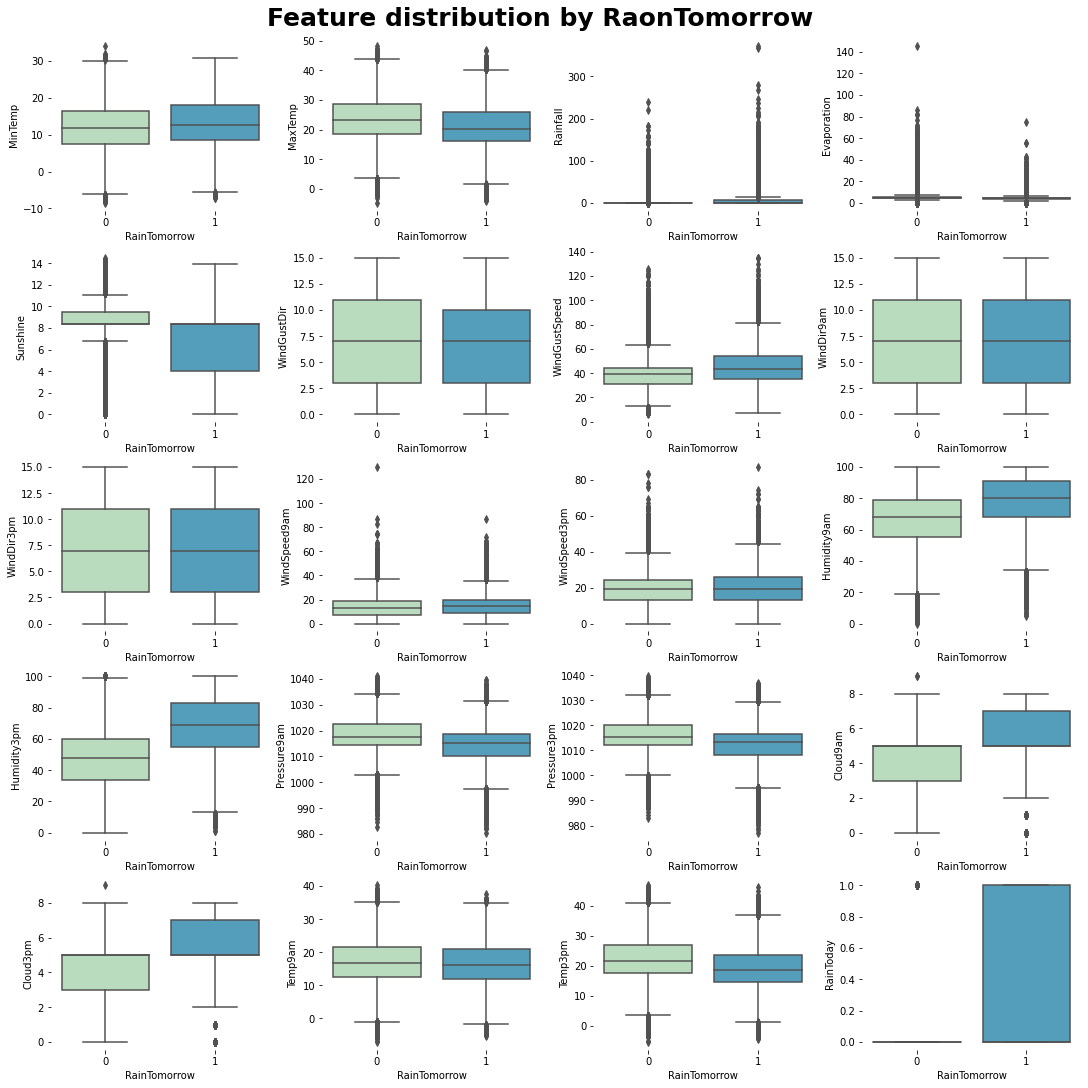

In [25]:
int_cols = data.select_dtypes(exclude=['category','object']).columns.to_list()
fig, ax= plt.subplots(nrows=5, ncols=4, figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by RaonTomorrow ', size=25, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    if i == "RainTomorrow":
        continue
    sns.boxplot(data=data, y=i, x='RainTomorrow', ax=ax[x],palette='GnBu')
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

correlation

<AxesSubplot:>

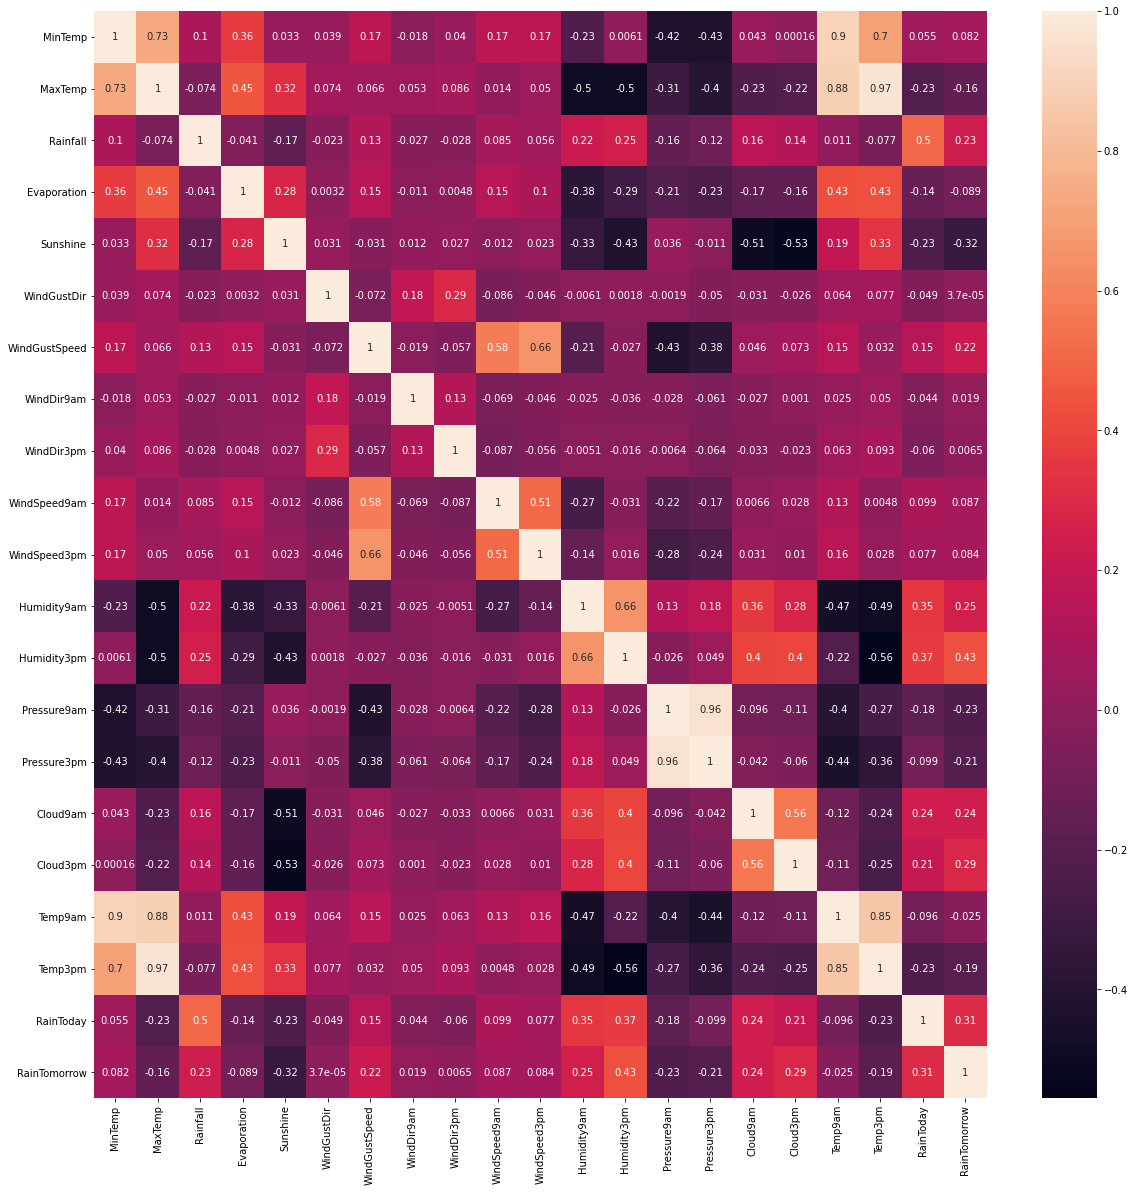

In [26]:
corr=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

drop unnecessary columns

In [27]:
data.drop(['Location','Date'],axis=1,inplace=True)
X=data.drop(['RainTomorrow'],axis=1)

y=data['RainTomorrow']

Feature selection

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
ex=ExtraTreesClassifier()
ex.fit(X,y)

ExtraTreesClassifier()

In [29]:
ex.feature_importances_


array([0.04433332, 0.04466986, 0.03199349, 0.02967112, 0.05880538,
       0.03767078, 0.05851222, 0.03818855, 0.03857165, 0.03892384,
       0.04031357, 0.05230659, 0.14904957, 0.05135012, 0.05708089,
       0.03531352, 0.05087751, 0.04204271, 0.04561332, 0.05471198])

first 15 important features

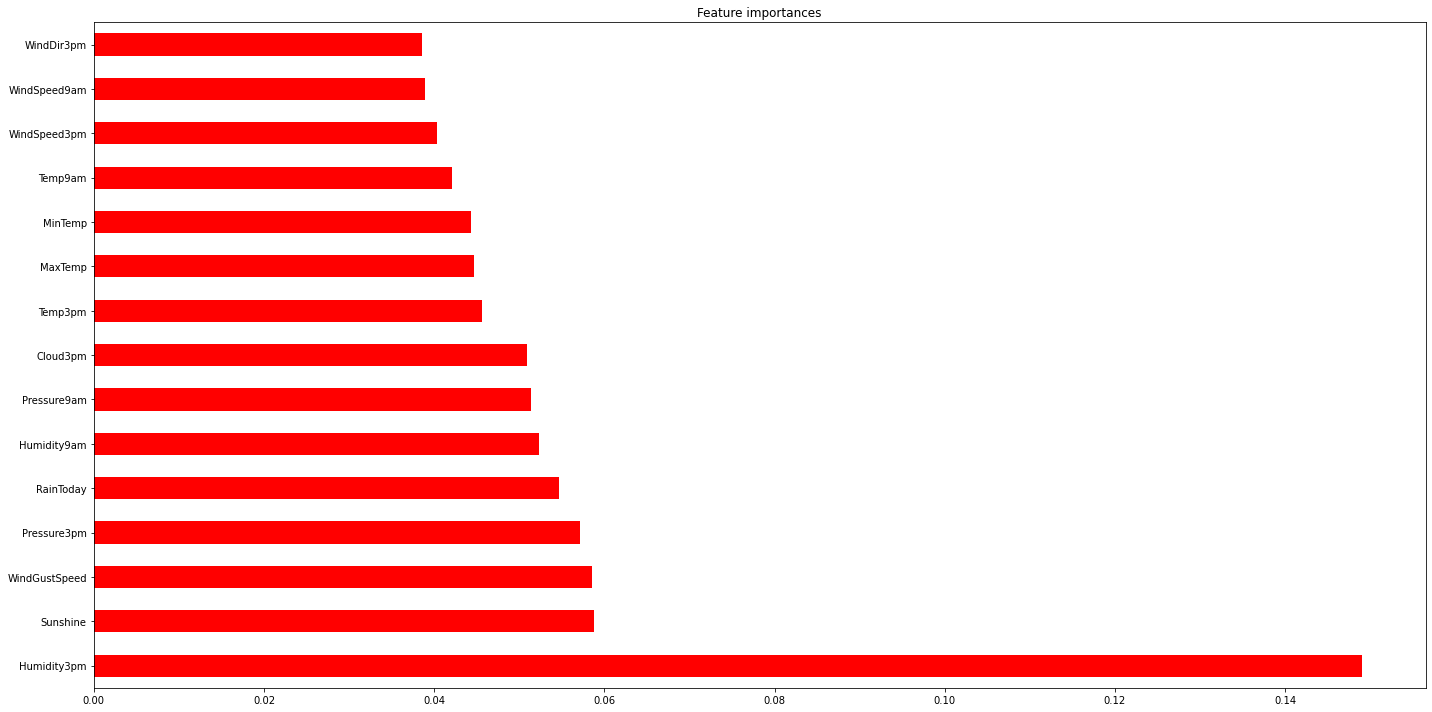

In [30]:
plt.figure(figsize=(20,10))
plt.title('Feature importances')
feat=pd.Series(ex.feature_importances_,index=X.columns)
feat.nlargest(15).plot(kind='barh', color="r", align="center")
plt.tight_layout()
plt.show()

drop the rest

In [31]:
data.drop(['Evaporation','Cloud9am','Rainfall','WindGustDir','WindDir9am'],axis=1,inplace=True)

splitting data

In [32]:
from sklearn.model_selection import train_test_split ,cross_val_score, GridSearchCV,RandomizedSearchCV
X_train ,X_test,y_train ,y_test =train_test_split(X,y,test_size =.4 , random_state=42 , stratify=y)

feature scaling

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


import models

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression ,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier

In [37]:
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boosting Classifier':GradientBoostingClassifier(),
         'Support Vector Machine': SVC(),
         'Stochastic Gradien Descent': SGDClassifier(),
         'Naive Bayes': GaussianNB(),
         'xgb Classifier': XGBClassifier()}

function to fit and score models

In [38]:
def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = cross_val_score(model,
                                             X_test,
                                             y_test,
                                            scoring='accuracy',
                                            cv=3
                                            ).mean()

    return model_scores

XBGoost has high score

In [39]:
model_scores = fit_score(models,X_train,X_test,y_train,y_test)

model_scores

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:56:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:56:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:56:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:56:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'Logistic Regression': 0.8450261005927396,
 'KNN': 0.8297814082059789,
 'Decision Tree': 0.7774129918431011,
 'Random Forest': 0.8508696666155607,
 'Gradient Boosting Classifier': 0.8497353128840562,
 'Support Vector Machine': 0.851110283774176,
 'Stochastic Gradien Descent': 0.839560599900452,
 'Naive Bayes': 0.8056510471284385,
 'xgb Classifier': 0.8515743102629951}

visualize the score of each model

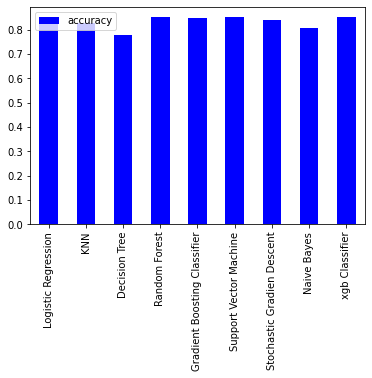

In [40]:
models = pd.DataFrame(model_scores, index=["accuracy"])
models.T.plot.bar(color="blue");

hyperparameter tuning of XGBoost with RandomizedSearch

In [41]:
np.random.seed(42)
params = {"learning_rate": [0.05,0.20, 0.30 ] ,
 "max_depth": [ 3 ,6,10],
 "min_child_weight" : [ 1, 3, 5]}


rs = RandomizedSearchCV(XGBClassifier(),
                                param_distributions=params,
                                cv=3,
                                n_iter=30,
                                verbose=0,
                                n_jobs=-1
                               )

rs.fit(X_train, y_train)

rs.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 27 is smaller than n_iter=30. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:46:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.2}

In [42]:
rs.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
rs.score(X_test, y_test)


0.8555444795820156

In [48]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

[10:52:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


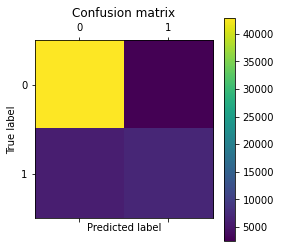

In [50]:
cm=confusion_matrix(y_test,y_pred1.round())
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [47]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.95      0.91     45433
           1       0.73      0.54      0.62     12751

    accuracy                           0.86     58184
   macro avg       0.81      0.74      0.77     58184
weighted avg       0.85      0.86      0.85     58184

